# Question 1:
   **a.** There are 32 ecorr_V and 32 epot_V values. The number of measurements are total amount of data collected, but the number of reactors mean that these measurements are distributed amongst 8 separate reactors. This means, there are only 4 repeated measurements taken for each reactor, which reduces the sample size for statistical analysis. 

Standard deviation of ecorr_V: 0.02103799013193835
Standard deviation of epit_V: 0.07584648331199374


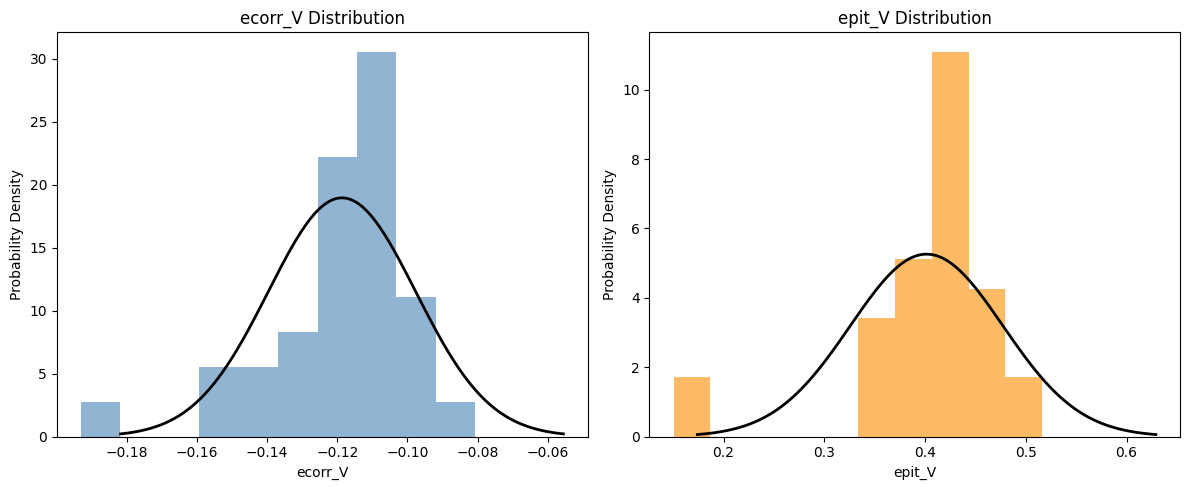

In [2]:
#Code for B


import numpy as np
import matplotlib.pyplot as plt

# Load CSV (skip header, select columns ecorr_V and epit_V)
data = np.genfromtxt(
    "MAP-E Dataset.csv",
    delimiter=",",
    skip_header=1
)

# Column indices based on the CSV:
# ecorr_V = column 4
# epit_V  = column 5
ecorr_V = data[:, 4]
epit_V = data[:, 5]

# Calculate standard deviations
# Sample standard deviations are used, as n is not high relative to the amount measurements a reactor could have
ecorr_mean, ecorr_std = np.mean(ecorr_V), np.std(ecorr_V, ddof=1)
epit_mean, epit_std = np.mean(epit_V), np.std(epit_V, ddof=1)

print(f"Standard deviation of ecorr_V: {ecorr_std}")
print(f"Standard deviation of epit_V: {epit_std}")


# Create x ranges for normal distributions
x_ecorr = np.linspace(
    ecorr_mean - 3 * ecorr_std,
    ecorr_mean + 3 * ecorr_std,
    300
)

x_epit = np.linspace(
    epit_mean - 3 * epit_std,
    epit_mean + 3 * epit_std,
    300
)

# Normal distribution PDFs
pdf_ecorr = (1 / (ecorr_std * np.sqrt(2 * np.pi))) * \
            np.exp(-0.5 * ((x_ecorr - ecorr_mean) / ecorr_std) ** 2)

pdf_epit = (1 / (epit_std * np.sqrt(2 * np.pi))) * \
           np.exp(-0.5 * ((x_epit - epit_mean) / epit_std) ** 2)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


#Part C Histograms
# ecorr_V histogram
axes[0].hist(ecorr_V, bins=10, density=True, alpha=0.6, color="steelblue")
axes[0].plot(x_ecorr, pdf_ecorr, color="black", linewidth=2)
axes[0].set_title("ecorr_V Distribution")
axes[0].set_xlabel("ecorr_V")
axes[0].set_ylabel("Probability Density")

# epit_V histogram
axes[1].hist(epit_V, bins=10, density=True, alpha=0.6, color="darkorange")
axes[1].plot(x_epit, pdf_epit, color="black", linewidth=2)
axes[1].set_title("epit_V Distribution")
axes[1].set_xlabel("epit_V")
axes[1].set_ylabel("Probability Density")

plt.tight_layout()
plt.show()

**c.**  Both samples peak to the right of the normal distribution mean, and have high frequencies at very low values, close to -3*$\sigma$.

**d.**
A t-Student distribution is more appropriate for modelling the uncertainty in the sample mean, as there's only 4 repeated samplings per reactor, and the population variance is unknown.

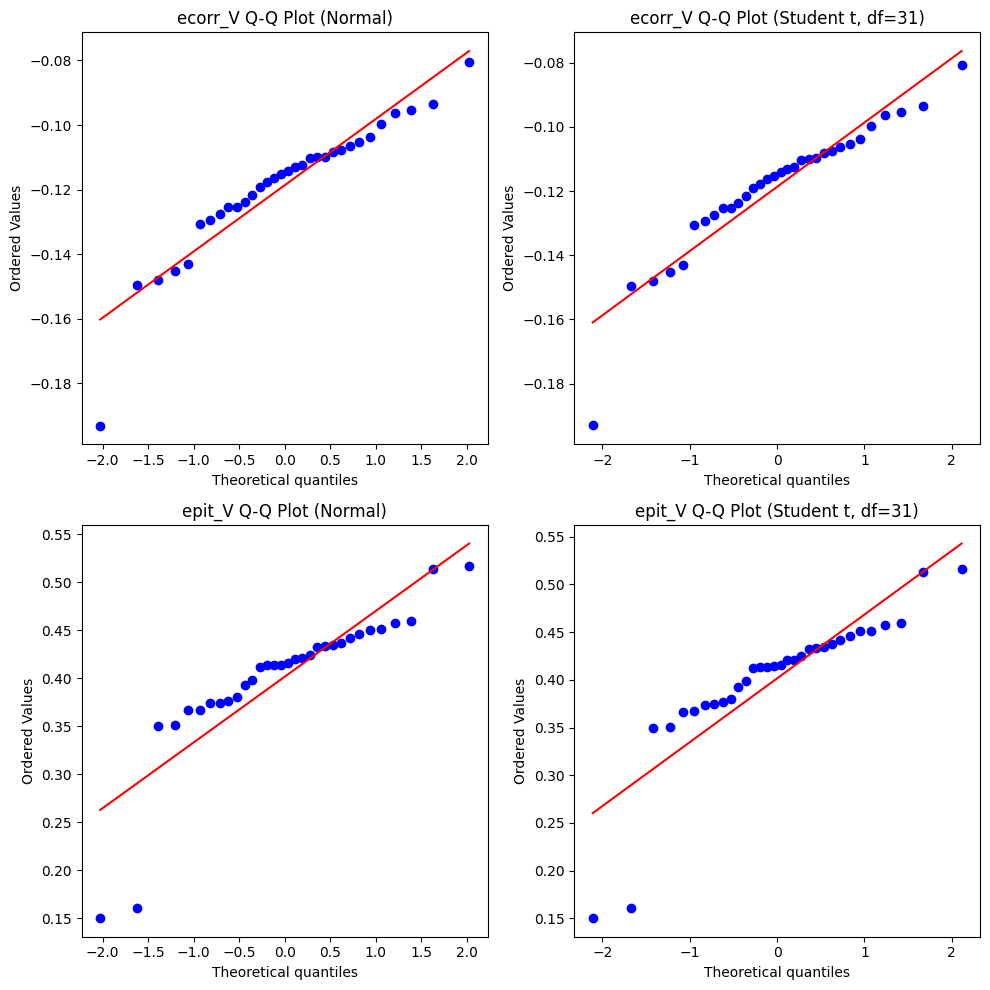

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Sample sizes and degrees of freedom
n_ecorr = len(ecorr_V)
n_epit  = len(epit_V)

df_ecorr = n_ecorr - 1
df_epit  = n_epit - 1

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# ---- ecorr_V vs Normal ----
stats.probplot(ecorr_V, dist="norm", plot=axes[0, 0])
axes[0, 0].set_title("ecorr_V Q-Q Plot (Normal)")

# ---- ecorr_V vs Student-t ----
stats.probplot(ecorr_V, dist=stats.t, sparams=(df_ecorr,), plot=axes[0, 1])
axes[0, 1].set_title(f"ecorr_V Q-Q Plot (Student t, df={df_ecorr})")

# ---- epit_V vs Normal ----
stats.probplot(epit_V, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title("epit_V Q-Q Plot (Normal)")

# ---- epit_V vs Student-t ----
stats.probplot(epit_V, dist=stats.t, sparams=(df_epit,), plot=axes[1, 1])
axes[1, 1].set_title(f"epit_V Q-Q Plot (Student t, df={df_epit})")

plt.tight_layout()
plt.show()


**more e.**
The empirical data mostly follows the theoretical distributions, and only deviates at the tails, while the center remains mostly normally distributed. Because the sample size is relatively big, the t-Student distribution very closely resembles the normal distribution. 

**f.**
The more samples taken, the closer the sample mean will be from the population mean, as the Central Limit Theorem states. As more samples are taken, the sample mean will better represent the mean from the full dataset. From this example, the more samples taken, even if the data is not normally distributed, the realized expected values will be.

**g.**
Since there are 8 reactors, if any of them are broken, it will drastically throw off the variance, the poorly behaved ones will consistently throw out deviant values. Through this question, we have always assumed that all reactors are equal in performance.

Independently distributing the data results in very little samples per reactor, with only 4 samples each one. Identically distributing the data results requires all reactors to be behaving decently well, which may not be ideal, given that machines don't always behave the way you want them to.


### Question 2

**a.**
1. obs is the intensity value the XRD machine spits out, calc is the theoretical peak value derived mechanistically and using a model, and diff is the difference between the two values.
2. The residual shows how inaccurate the model is, and it can come from many difficult-to-control parameters that throw random values which are hard to mathematically extrapolate.
3. An ideal model would be centered around zero, and look like random noise, as it means that the only random peaks are supposed to be random. 

**b.**
1. Since $\Chi^2$ is already squared, squaring the residuals allows for the values to be only positive, which gives the magnitude of the incorrectness.
2. While the numerator calculates for the error, the denominator calculates for the uncertainty
3. Sometimes people may assume that the error they sample (the residual) represents the variance of the population, which is not true. This is because the sample may be biased, and does not fully represent the conditions of a full population.

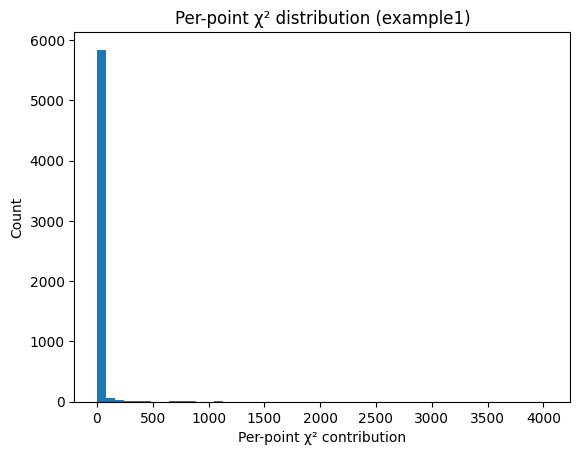

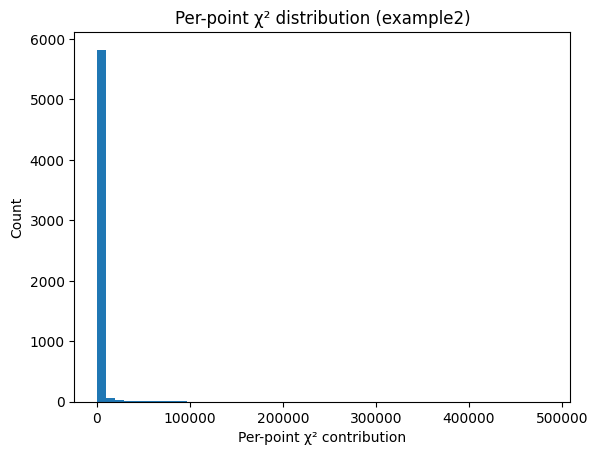

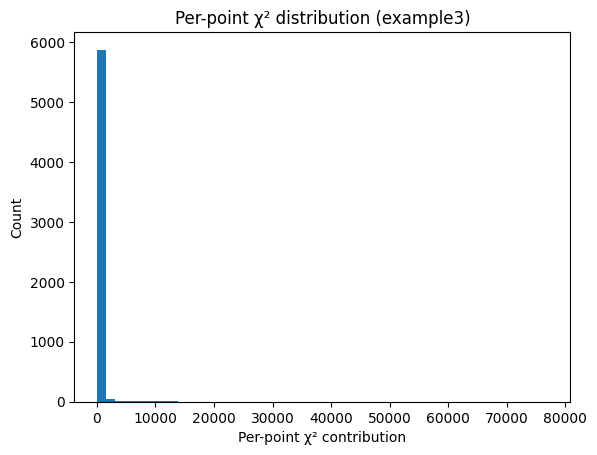

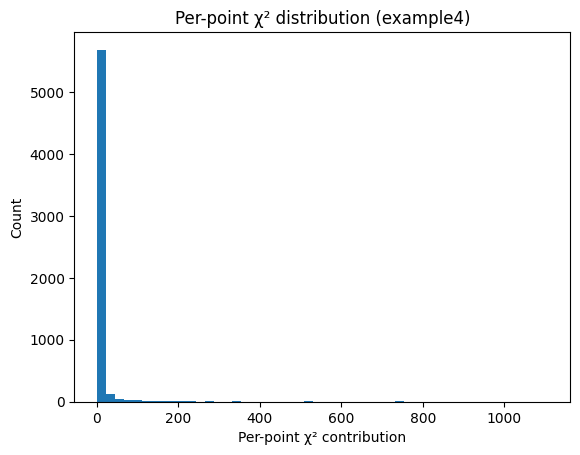

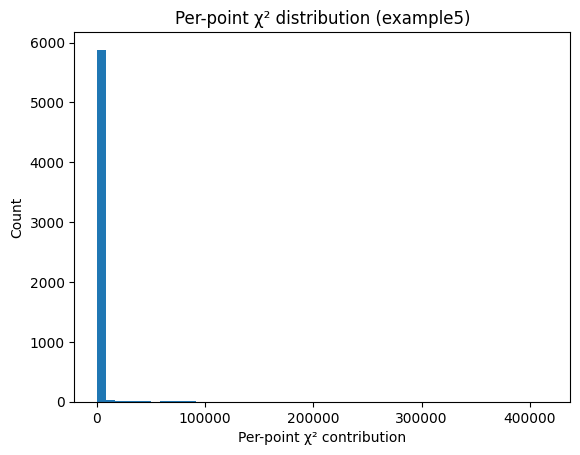

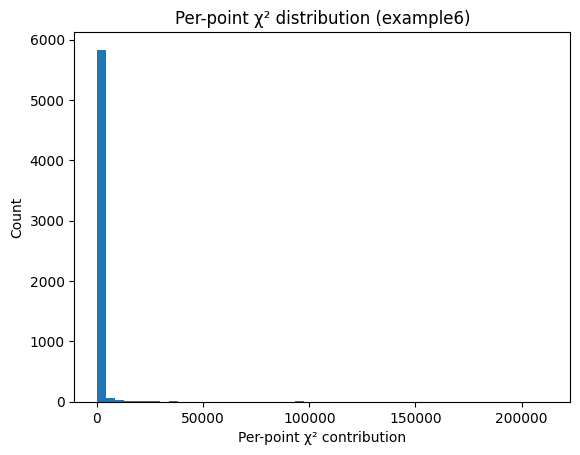

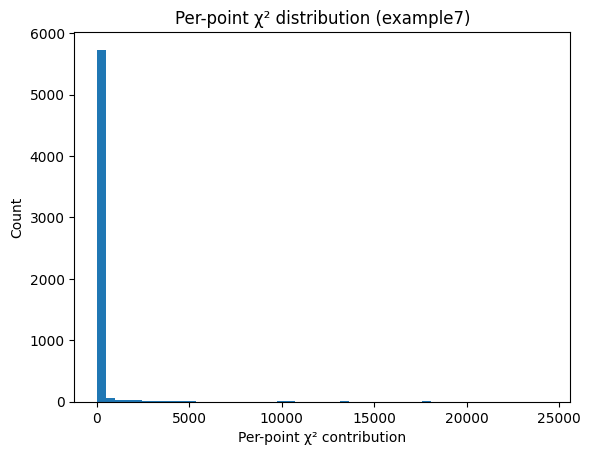

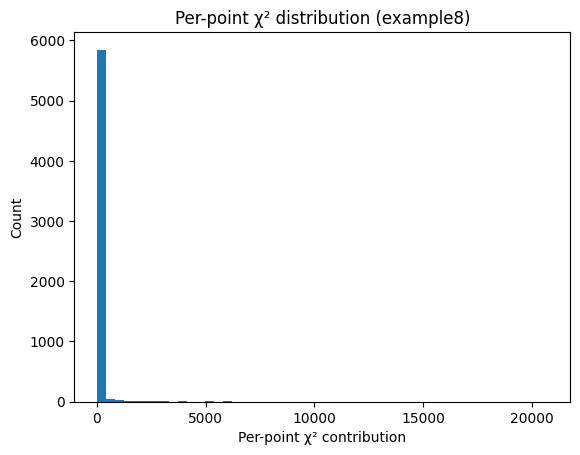

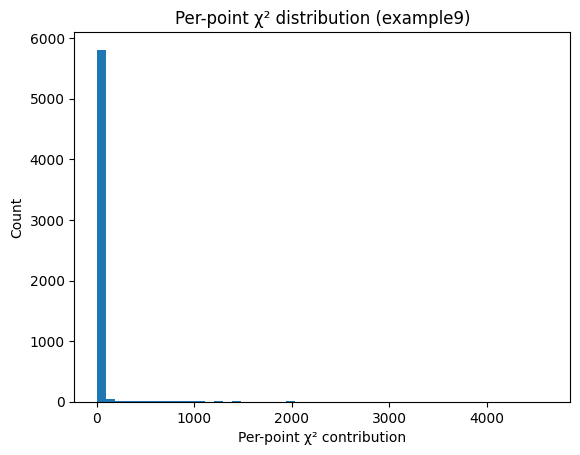

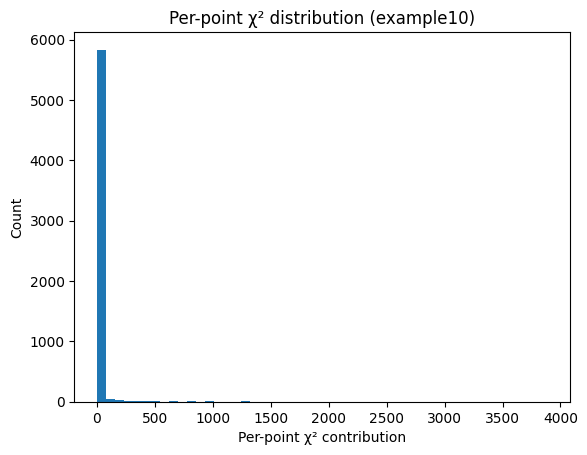

Total χ² (all files): 31545697.989627946
Total number of data points: 60010
Reduced χ²: 525.6740208236619


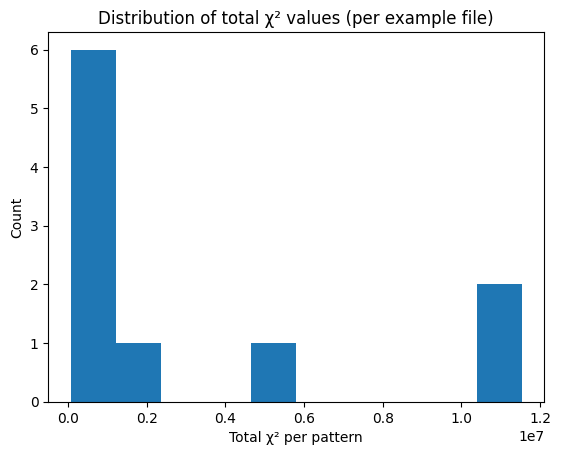

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

total_chi2 = 0.0
n_points = 0
chi2_per_file = []

for i in range(1, 11):
    df = pd.read_csv(f"example{i}.csv")

    # Keep only needed columns
    df = df[["obs", "calc"]]

    # Force numeric, drop junk
    df = df.apply(pd.to_numeric, errors="coerce")
    df = df.dropna()

    obs = df["obs"].values
    calc = df["calc"].values

    # Poisson variance approximation
    variance = np.where(obs > 0, obs, 1.0)

    chi2_per_point = (obs - calc) ** 2 / variance

    file_chi2 = np.sum(chi2_per_point)

    total_chi2 += file_chi2
    n_points += len(chi2_per_point)
    chi2_per_file.append(file_chi2)

    # ---- Plot per-point χ² for THIS file ----
    plt.figure()
    plt.hist(chi2_per_point, bins=50)
    plt.xlabel("Per-point χ² contribution")
    plt.ylabel("Count")
    plt.title(f"Per-point χ² distribution (example{i})")
    plt.show()

print("Total χ² (all files):", total_chi2)
print("Total number of data points:", n_points)

# ---- Plot distribution of total χ² per file ----
plt.figure()
plt.hist(chi2_per_file, bins=10)
plt.xlabel("Total χ² per pattern")
plt.ylabel("Count")
plt.title("Distribution of total χ² values (per example file)")
plt.show()


**d.**
The shapes of the distributions are very heavy on the low $\Chi^2$, and it shows that the model fits the data quite well. It seems rather consistent with what I would expect with noise, as most of the data fit quite well, and the ones that do not fit to random degrees of poorness.


In [27]:
import numpy as np
import pandas as pd

reduced_chi2_per_file = []

for i in range(1, 11):
    df = pd.read_csv(f"example{i}.csv")

    # Keep only needed columns
    df = df[["obs", "calc"]]

    # Convert to numeric and drop invalid rows
    df = df.apply(pd.to_numeric, errors="coerce")
    df = df.dropna()

    obs = df["obs"].values
    calc = df["calc"].values

    # Poisson variance approximation: σ² ≈ obs, floor at 1
    variance = np.where(obs > 0, obs, 1.0)

    # Per-point χ²
    chi2_per_point = (obs - calc) ** 2 / variance

    # Total χ² for this pattern
    chi2_total = np.sum(chi2_per_point)

    # Degrees of freedom (no hardcoding)
    nu = len(chi2_per_point)   # or len(...) - n_params if you later add that

    reduced_chi2 = chi2_total / nu
    reduced_chi2_per_file.append(reduced_chi2)

    print(f"example{i}.csv :  reduced χ² = {reduced_chi2:.4f}   (N = {nu})")


example1.csv :  reduced χ² = 17.4708   (N = 6001)
example2.csv :  reduced χ² = 1921.7508   (N = 6001)
example3.csv :  reduced χ² = 296.3591   (N = 6001)
example4.csv :  reduced χ² = 11.9315   (N = 6001)
example5.csv :  reduced χ² = 1759.7200   (N = 6001)
example6.csv :  reduced χ² = 896.9092   (N = 6001)
example7.csv :  reduced χ² = 189.9995   (N = 6001)
example8.csv :  reduced χ² = 110.8072   (N = 6001)
example9.csv :  reduced χ² = 30.0006   (N = 6001)
example10.csv :  reduced χ² = 21.7915   (N = 6001)


**e.**
1. When a model is fitted to data, there are points that are forced to meet with each other, so they can be "overlayed" on each other. The degrees of freedom represent the amount of data that can continue to fluctuate, and are not forced to have zero deviation from the rest of the data.
2. Done above
3. A $\Chi_{\nu}^2$ much larger than 1 suggests the model is not fit well enough to the actual data, meaning the difference between the observed and the model too high. However, if it's too low, it means that the model predicted too much noise.

**f.**
Examples 1, 2, 9, 10 seem to be fit especially well compared to the other ones. Example 2 and 5 are especially poorly fit, with $\Chi^2$ that are very large compared to the rest.
$\Chi^2$ alone could be misleading when there is something wrong with the machine, as it can only describe how well the model fits based on variance. For example, $\Chi^2$ can tell you how closely your bullets are from each other, which can describe how steady your hands are. However, if the scope is not zeroed, you will not be hitting the target. Same here, if the model can corretly fit a noisy dataset from a crappy machine, the model is still quite crappy. (Two wrongs don't make a right)

**h.**
$\Chi^2$ is a good measure of fit when you know the data you are trying to fit on is legit. It is limited when the observations are biased. It only measures the precision of the model, not the accuracy of the model and the underlying data itself, as it basically calculates for the average variance of the model to the data. This also means that the noise must be assumed to be random, and not correlated with the actual underlying mechanism. In this instance, it must be assumed that the noise comes from a buggy XRD machine, and it's not possible to be legit peaks from a borderline physically impossible crystal structure. In the end, it's still important for humans to judge the fit alongside the statistical metrics, as there are simply too many parameters for the math to describe, where experience cannot be beat.
